## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd = os.getcwd(); print("Working dir: " + cwd)

Working dir: /Users/dang/Documents/TablerLab/Code


In [2]:
data_path = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/";
filename = "Tracks_Results_from_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_in_um_per_min.csv";
#filename = "test.csv"
loaded_data = pd.read_csv( data_path+filename )
loaded_data.head()

,Track,Slice,X,Y,Distance,Velocity,Pixel Value
0,1,1,2022,795,-1.000,-1.000,17
1,1,2,2007,777,3.023,0.302,8
2,1,3,2007,791,1.806,0.181,10
3,1,4,2024,797,2.326,0.233,15
4,1,5,2035,802,1.559,0.156,8


In [3]:
# --- Input parameters ---

# Number of pixels per micron
pix_per_micron = 4.400; # 190305
#pix_per_micron = 5.1040; # 190314
#pix_per_micron = 5.1040; # 200120

### Process data

In [4]:
# Total number of cells
N_cells = len(np.unique(loaded_data.Track));
print("Number of cells = " + str(N_cells))

# Number of slices per cell
N_slices = len(np.unique(loaded_data.Slice));
print("Number of slices per cell = " + str(N_slices))

Number of cells = 11
Number of slices per cell = 73


In [5]:
# Extract X and Y coordinates for each cell
X_all = np.nan*np.zeros([N_cells, N_slices]);
Y_all = np.nan*np.zeros([N_cells, N_slices]);

for i in range(N_cells):
    # select cell i
    data_cell_i = loaded_data.loc[loaded_data.Track == i+1];
    slices_cell_i = data_cell_i.Slice-1;
    
    # store data
    X_all[i, slices_cell_i] = data_cell_i.X;
    Y_all[i, slices_cell_i] = data_cell_i.Y; 

In [6]:
# For plotting:
slices_all = np.array([range(N_slices) for i in range(N_cells)])/6;

# time range to plot
t_lower = 0; # starting time in hrs
t_upper = 6; # final time in hrs
slice_range = range(t_lower*6, t_upper*6); # hours*6
#slice_range = range(Nslices) #full range

## Plot horizontal displacement vs t
Shows displacement of cells relative to their initial position in the direction perpendicular to the front (horizontal).

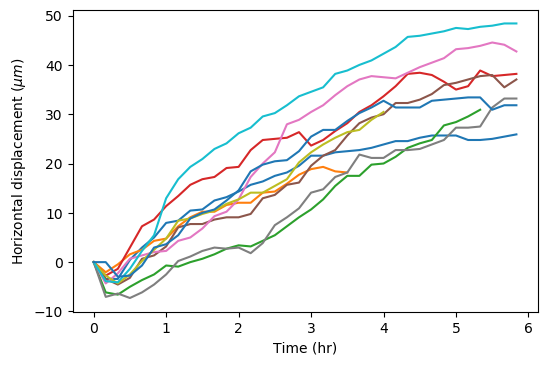

In [7]:
# Plot displacements in horizontal direction vs t
X_displacements = np.array(list(map(lambda x: x-x[0], X_all)))/pix_per_micron; # units: microns

plt.figure(dpi=100);
plt.plot(slices_all[:, slice_range].T, X_displacements[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('Horizontal displacement ($\\mu m$)')
plt.show()

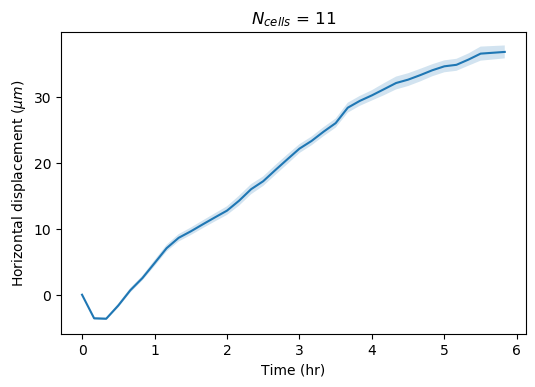

Net mean velocity over 6 hours = 6.0 microns/hr
Shaded area = standard error of the mean


In [8]:
# --- Average over all cells ---
# x, y data
slices = slices_all[0, slice_range];
X_displacements_avg = np.nanmean(X_displacements[:, slice_range], axis=0);

# Compute SEM
std_all = np.nanstd(X_displacements[:, slice_range], axis=0); # Std for each time point
n_all = np.sum(~np.isnan(X_displacements[:, slice_range]), axis=0); # no. data points per time point
sem_all = std_all/n_all;

plt.figure(dpi=100);
plt.plot(slices, X_displacements_avg)
plt.fill_between(slices, X_displacements_avg+sem_all, X_displacements_avg-sem_all, alpha=0.2)
plt.xlabel('Time (hr)')
plt.ylabel('Horizontal displacement ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

print("Net mean velocity over {} hours = {} microns/hr".format(t_upper, round(X_displacements_avg[-1]/t_upper)) )
print("Shaded area = standard error of the mean")

## Plot MSD vs t
Shows mean squared displacements of cells in 2D.

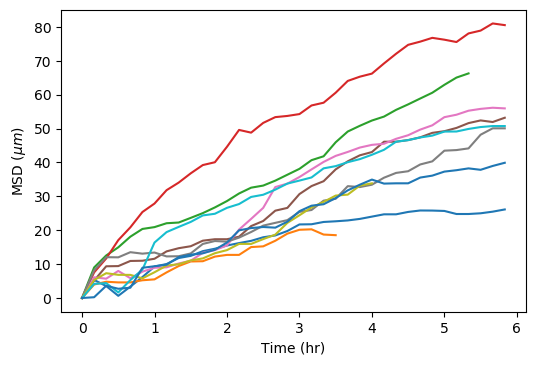

In [9]:
# Plot displacements in horizontal direction vs t
MSD_all = np.array(list(map( lambda X, Y: np.sqrt( (X-X[0])**2 + (Y-Y[0])**2) , X_all, Y_all)))/pix_per_micron; # units: microns

plt.figure(dpi=100);
plt.plot(slices_all[:, slice_range].T, MSD_all[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('MSD ($\\mu m$)')
plt.show()

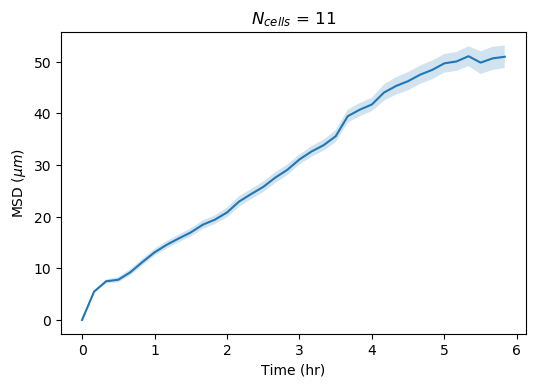

Shaded area = standard error of the mean


In [10]:
# --- Average over all cells ---
# x, y data
slices = slices_all[0, slice_range];
MSD_avg = np.nanmean(MSD_all[:, slice_range], axis=0);

# Compute SEM
std_all = np.nanstd(MSD_all[:, slice_range], axis=0); # Std for each time point
n_all = np.sum(~np.isnan(MSD_all[:, slice_range]), axis=0); # no. data points per time point
sem_all = std_all/n_all;

plt.figure(dpi=100);
plt.plot(slices, MSD_avg)
plt.fill_between(slices, MSD_avg+sem_all, MSD_avg-sem_all, alpha=0.2)
#plt.plot(slices, X_displacements_avg-sem_all)
#plt.plot(slices, X_displacements_avg+sem_all)
plt.xlabel('Time (hr)')
plt.ylabel('MSD ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

print("Shaded area = standard error of the mean")

## Plot absolute displacement vs t
Shows absolute distances travelled between time frames by cells.

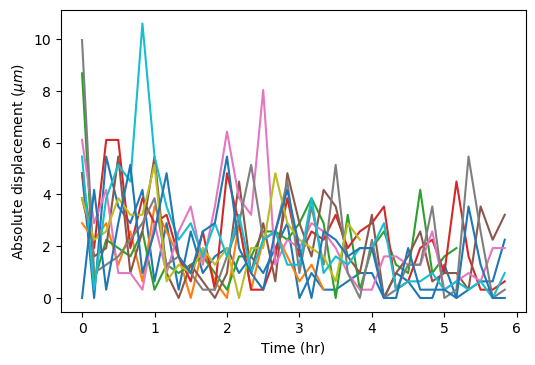

In [11]:
del_X_all = np.array(list(map(np.diff, X_all))); # X[t+1]-X[t] for all cells
del_Y_all = np.array(list(map(np.diff, Y_all))); # Y[t+1]-Y[t] for all cells
abs_displacements_all = np.sqrt(del_X_all**2 + del_X_all**2)/pix_per_micron; # units: microns

plt.figure(dpi=100);
plt.plot(slices_all[:, slice_range].T, abs_displacements_all[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('Absolute displacement ($\\mu m$)')
plt.show()

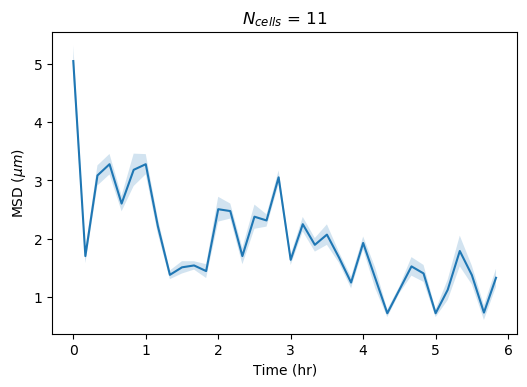

Shaded area = standard error of the mean


In [12]:
# --- Average over all cells ---
# x, y data
slices = slices_all[0, slice_range];
abs_displacements_avg = np.nanmean(abs_displacements_all[:, slice_range], axis=0);

# Compute SEM
std_all = np.nanstd(abs_displacements_all[:, slice_range], axis=0); # Std for each time point
n_all = np.sum(~np.isnan(abs_displacements_all[:, slice_range]), axis=0); # no. data points per time point
sem_all = std_all/n_all;

plt.figure(dpi=100);
plt.plot(slices, abs_displacements_avg)
plt.fill_between(slices, abs_displacements_avg+sem_all, abs_displacements_avg-sem_all, alpha=0.2)
#plt.plot(slices, X_displacements_avg-sem_all)
#plt.plot(slices, X_displacements_avg+sem_all)
plt.xlabel('Time (hr)')
plt.ylabel('MSD ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

print("Shaded area = standard error of the mean")